In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [60]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# dateparse('1962-01')
data = pd.read_csv('Data_Venda_mes.csv', delimiter = ';', parse_dates=['DataVenda'], index_col='DataVenda',date_parser=dateparse)
data.head()

,Codigo
DataVenda,
2017-01-01,6
2017-02-01,12
2017-03-01,23
2017-04-01,11
2017-05-01,7


In [61]:
data.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='DataVenda', freq=None)

In [62]:
#convert to time series:
ts = data['Codigo']
ts.head(10)

DataVenda
2017-01-01     6
2017-02-01    12
2017-03-01    23
2017-04-01    11
2017-05-01     7
2017-06-01    11
2017-07-01    40
2017-08-01    59
2017-09-01    56
2017-10-01    29
Name: Codigo, dtype: int64

In [64]:
#1. Specific the index as a string constant:
ts['2017-01-01']

6

In [65]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime

In [66]:
#1. Specify the entire range:
ts['2017-01-01':'2020-05-01']

DataVenda
2017-01-01      6
2017-02-01     12
2017-03-01     23
2017-04-01     11
2017-05-01      7
2017-06-01     11
2017-07-01     40
2017-08-01     59
2017-09-01     56
2017-10-01     29
2017-11-01     40
2017-12-01     79
2018-01-01    105
2018-02-01    183
2018-03-01    170
2018-04-01    146
2018-05-01    116
2018-06-01    221
2018-07-01    313
2018-08-01    272
2018-09-01    297
2018-10-01    401
2018-11-01    317
2018-12-01    366
2019-01-01    483
2019-02-01    516
2019-03-01    555
2019-04-01    600
2019-05-01    467
2019-06-01    475
2019-07-01    511
2019-08-01    553
2019-09-01    476
2019-10-01    365
2019-11-01    403
2019-12-01    497
2020-01-01    465
Name: Codigo, dtype: int64

In [67]:
#All rows of 1962:
ts['2018']

DataVenda
2018-01-01    105
2018-02-01    183
2018-03-01    170
2018-04-01    146
2018-05-01    116
2018-06-01    221
2018-07-01    313
2018-08-01    272
2018-09-01    297
2018-10-01    401
2018-11-01    317
2018-12-01    366
Name: Codigo, dtype: int64

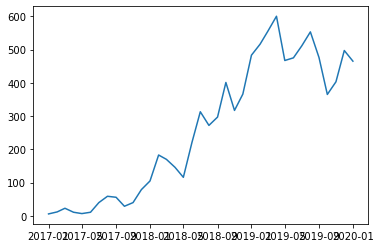

In [68]:
plt.plot(ts)

In [69]:
#Function for testing stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

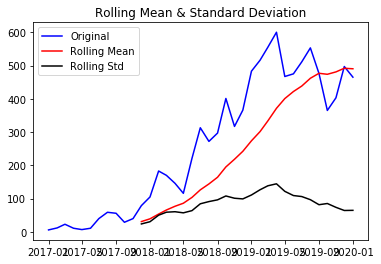

Results of Dickey-Fuller Test:
Test Statistic                 -0.879020
p-value                         0.794803
#Lags Used                      2.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [70]:
test_stationarity(ts)

In [ ]:
#Making TS Stationary
#Estimating & Eliminating Trend

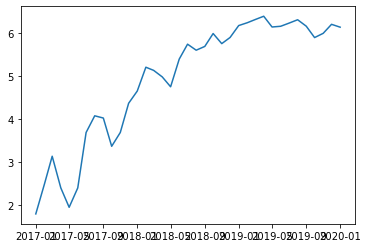

In [71]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [ ]:
#Smoothing:
#Moving average

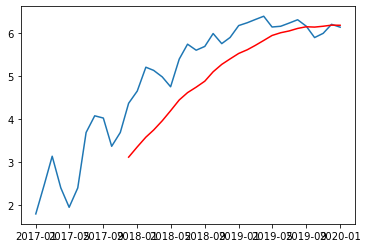

In [72]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [73]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

DataVenda
2017-01-01         NaN
2017-02-01         NaN
2017-03-01         NaN
2017-04-01         NaN
2017-05-01         NaN
2017-06-01         NaN
2017-07-01         NaN
2017-08-01         NaN
2017-09-01         NaN
2017-10-01         NaN
2017-11-01         NaN
2017-12-01    1.255177
Name: Codigo, dtype: float64

In [74]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

DataVenda
2017-12-01    1.255177
2018-01-01    1.301173
2018-02-01    1.629650
2018-03-01    1.389270
2018-04-01    1.021603
Name: Codigo, dtype: float64

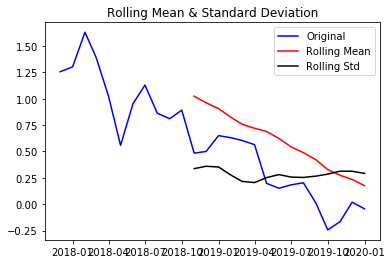

Results of Dickey-Fuller Test:
Test Statistic                  0.227868
p-value                         0.973782
#Lags Used                      7.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [75]:
test_stationarity(ts_log_moving_avg_diff)

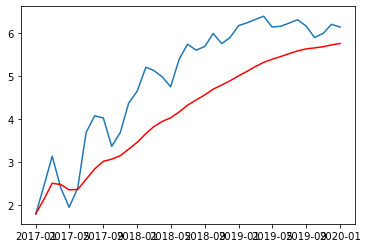

In [76]:
#Exponentially Weighted Moving Average
expwighted_avg = ts_log.ewm(12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

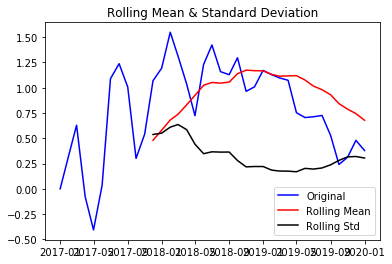

Results of Dickey-Fuller Test:
Test Statistic                 -0.443960
p-value                         0.902496
#Lags Used                      8.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [77]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

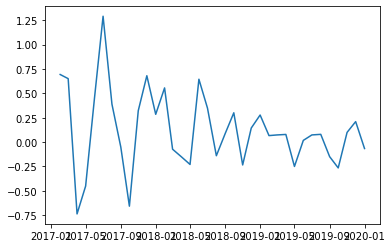

In [78]:
#Eliminating Trend and Seasonality
#Differencing:

#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

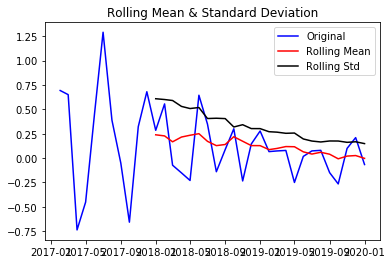

Results of Dickey-Fuller Test:
Test Statistic                 -0.836588
p-value                         0.808138
#Lags Used                      6.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [79]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

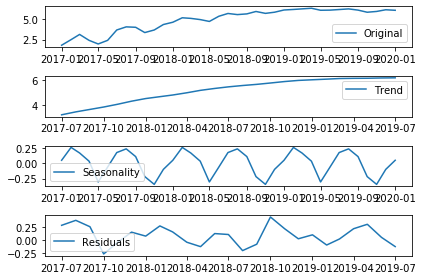

In [80]:
#Decomposition:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

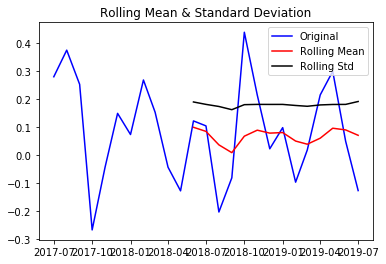

Results of Dickey-Fuller Test:
Test Statistic                -5.852059e+00
p-value                        3.570215e-07
#Lags Used                     1.000000e+00
Number of Observations Used    2.300000e+01
Critical Value (1%)           -3.752928e+00
Critical Value (5%)           -2.998500e+00
Critical Value (10%)          -2.638967e+00
dtype: float64


In [81]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
#Final Forecasting

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [82]:
ts_log_diff.dropna(inplace=True)

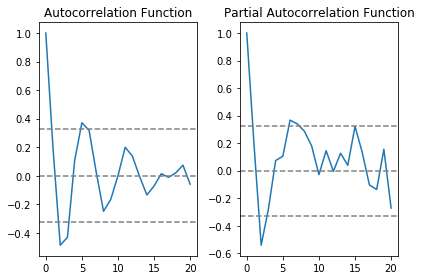

In [83]:
#CF & PACF Plots

#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 3.8696')

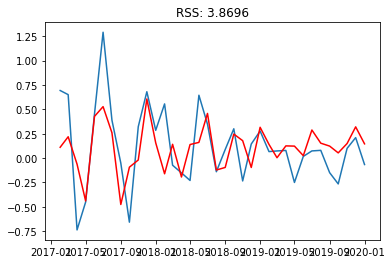

In [84]:
#AR Model:

#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 4.5481')

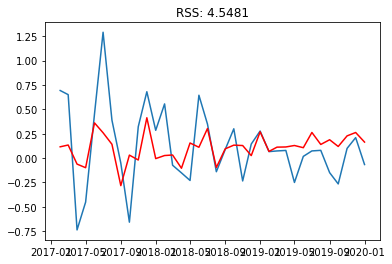

In [85]:
#MA Model

model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\thiago.silverio\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning:

Text(0.5, 1.0, 'RSS: nan')

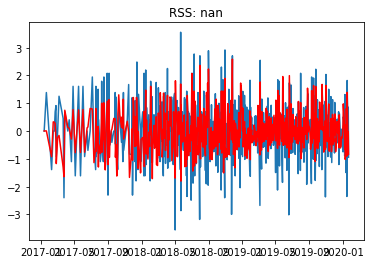

In [41]:
#ARIMA Model:

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
#Convert to original scale:

In [86]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

DataVenda
2017-01-11    0.004440
2017-01-19    0.006633
2017-02-07   -0.920765
2017-02-13    0.331486
2017-02-17    0.322651
dtype: float64


In [87]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

DataVenda
2017-01-11    0.004440
2017-01-19    0.011073
2017-02-07   -0.909692
2017-02-13   -0.578206
2017-02-17   -0.255555
dtype: float64


In [88]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

<ipython-input-88-a0e7889edee6>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)


DataVenda
2017-01-01    1.791759
2017-01-11    0.004440
2017-01-19    0.011073
2017-02-01    1.791759
2017-02-07   -0.909692
dtype: float64

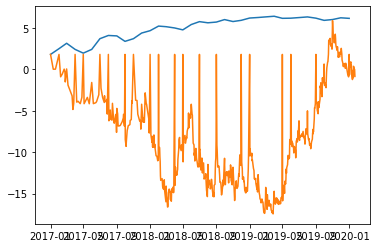

In [92]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: nan')

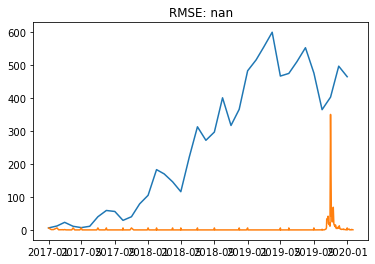

In [90]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))